**Yield Curve Prediction with Supervised Learning Models**

Section 1: Import Libraries

In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
from sklearn.preprocessing import StandardScaler
from pandas_datareader import data as web

# Modeling libraries
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

Section 2: Data Loading and Processing

In [ ]:
# Define treasury yields and economic indicators
tsy_tickers = ['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30',
               'TREAST', 'FYGFDPUN', 'FDHBFIN', 'GFDEBTN', 'BAA10Y']

# Fetch data
tsy_data = web.DataReader(tsy_tickers, 'fred').dropna(how='all').ffill()

# Process the economic indicators
tsy_data['FDHBFIN'] *= 1000
tsy_data['GOV_PCT'] = tsy_data['TREAST'] / tsy_data['GFDEBTN']
tsy_data['HOM_PCT'] = tsy_data['FYGFDPUN'] / tsy_data['GFDEBTN']
tsy_data['FOR_PCT'] = tsy_data['FDHBFIN'] / tsy_data['GFDEBTN']
tsy_data.dropna(inplace=True)


Section 3: Exploratory Data Analysis (EDA)

In [ ]:
print("\nDataset Shape:", tsy_data.shape)
tsy_data.head()


Dataset Shape: (1218, 16)


,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,TREAST,FYGFDPUN,FDHBFIN,GFDEBTN,BAA10Y,GOV_PCT,HOM_PCT,FOR_PCT
DATE,,,,,,,,,,,,,,,,
2020-01-01,1.48,1.55,1.59,1.58,1.69,1.83,1.92,2.39,2328933.0,17228778.0,6949500.0,23223813.0,1.98,0.100282,0.741858,0.29924
2020-01-02,1.53,1.54,1.56,1.58,1.67,1.79,1.88,2.33,2328933.0,17228778.0,6949500.0,23223813.0,1.98,0.100282,0.741858,0.29924
2020-01-03,1.52,1.52,1.55,1.53,1.59,1.71,1.80,2.26,2328933.0,17228778.0,6949500.0,23223813.0,1.99,0.100282,0.741858,0.29924
2020-01-06,1.54,1.56,1.54,1.54,1.61,1.72,1.81,2.28,2328933.0,17228778.0,6949500.0,23223813.0,2.02,0.100282,0.741858,0.29924
2020-01-07,1.52,1.54,1.53,1.54,1.62,1.74,1.83,2.31,2328933.0,17228778.0,6949500.0,23223813.0,2.03,0.100282,0.741858,0.29924


<Figure size 1200x600 with 0 Axes>

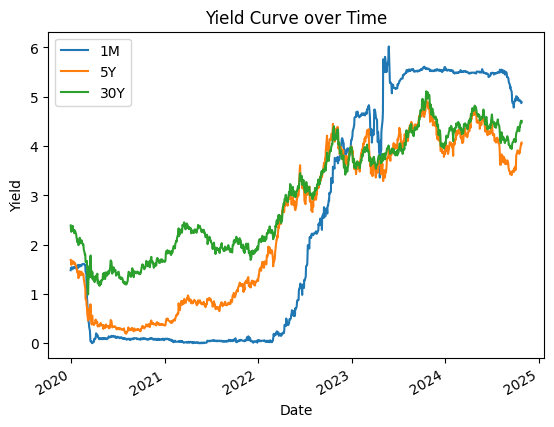

In [ ]:
# Plot the yield curve for different tenors
plt.figure(figsize=(12, 6))
tsy_data[['DGS1MO', 'DGS5', 'DGS30']].plot()
plt.title('Yield Curve over Time')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend(['1M', '5Y', '30Y'])
plt.show()

<Figure size 1500x1500 with 0 Axes>

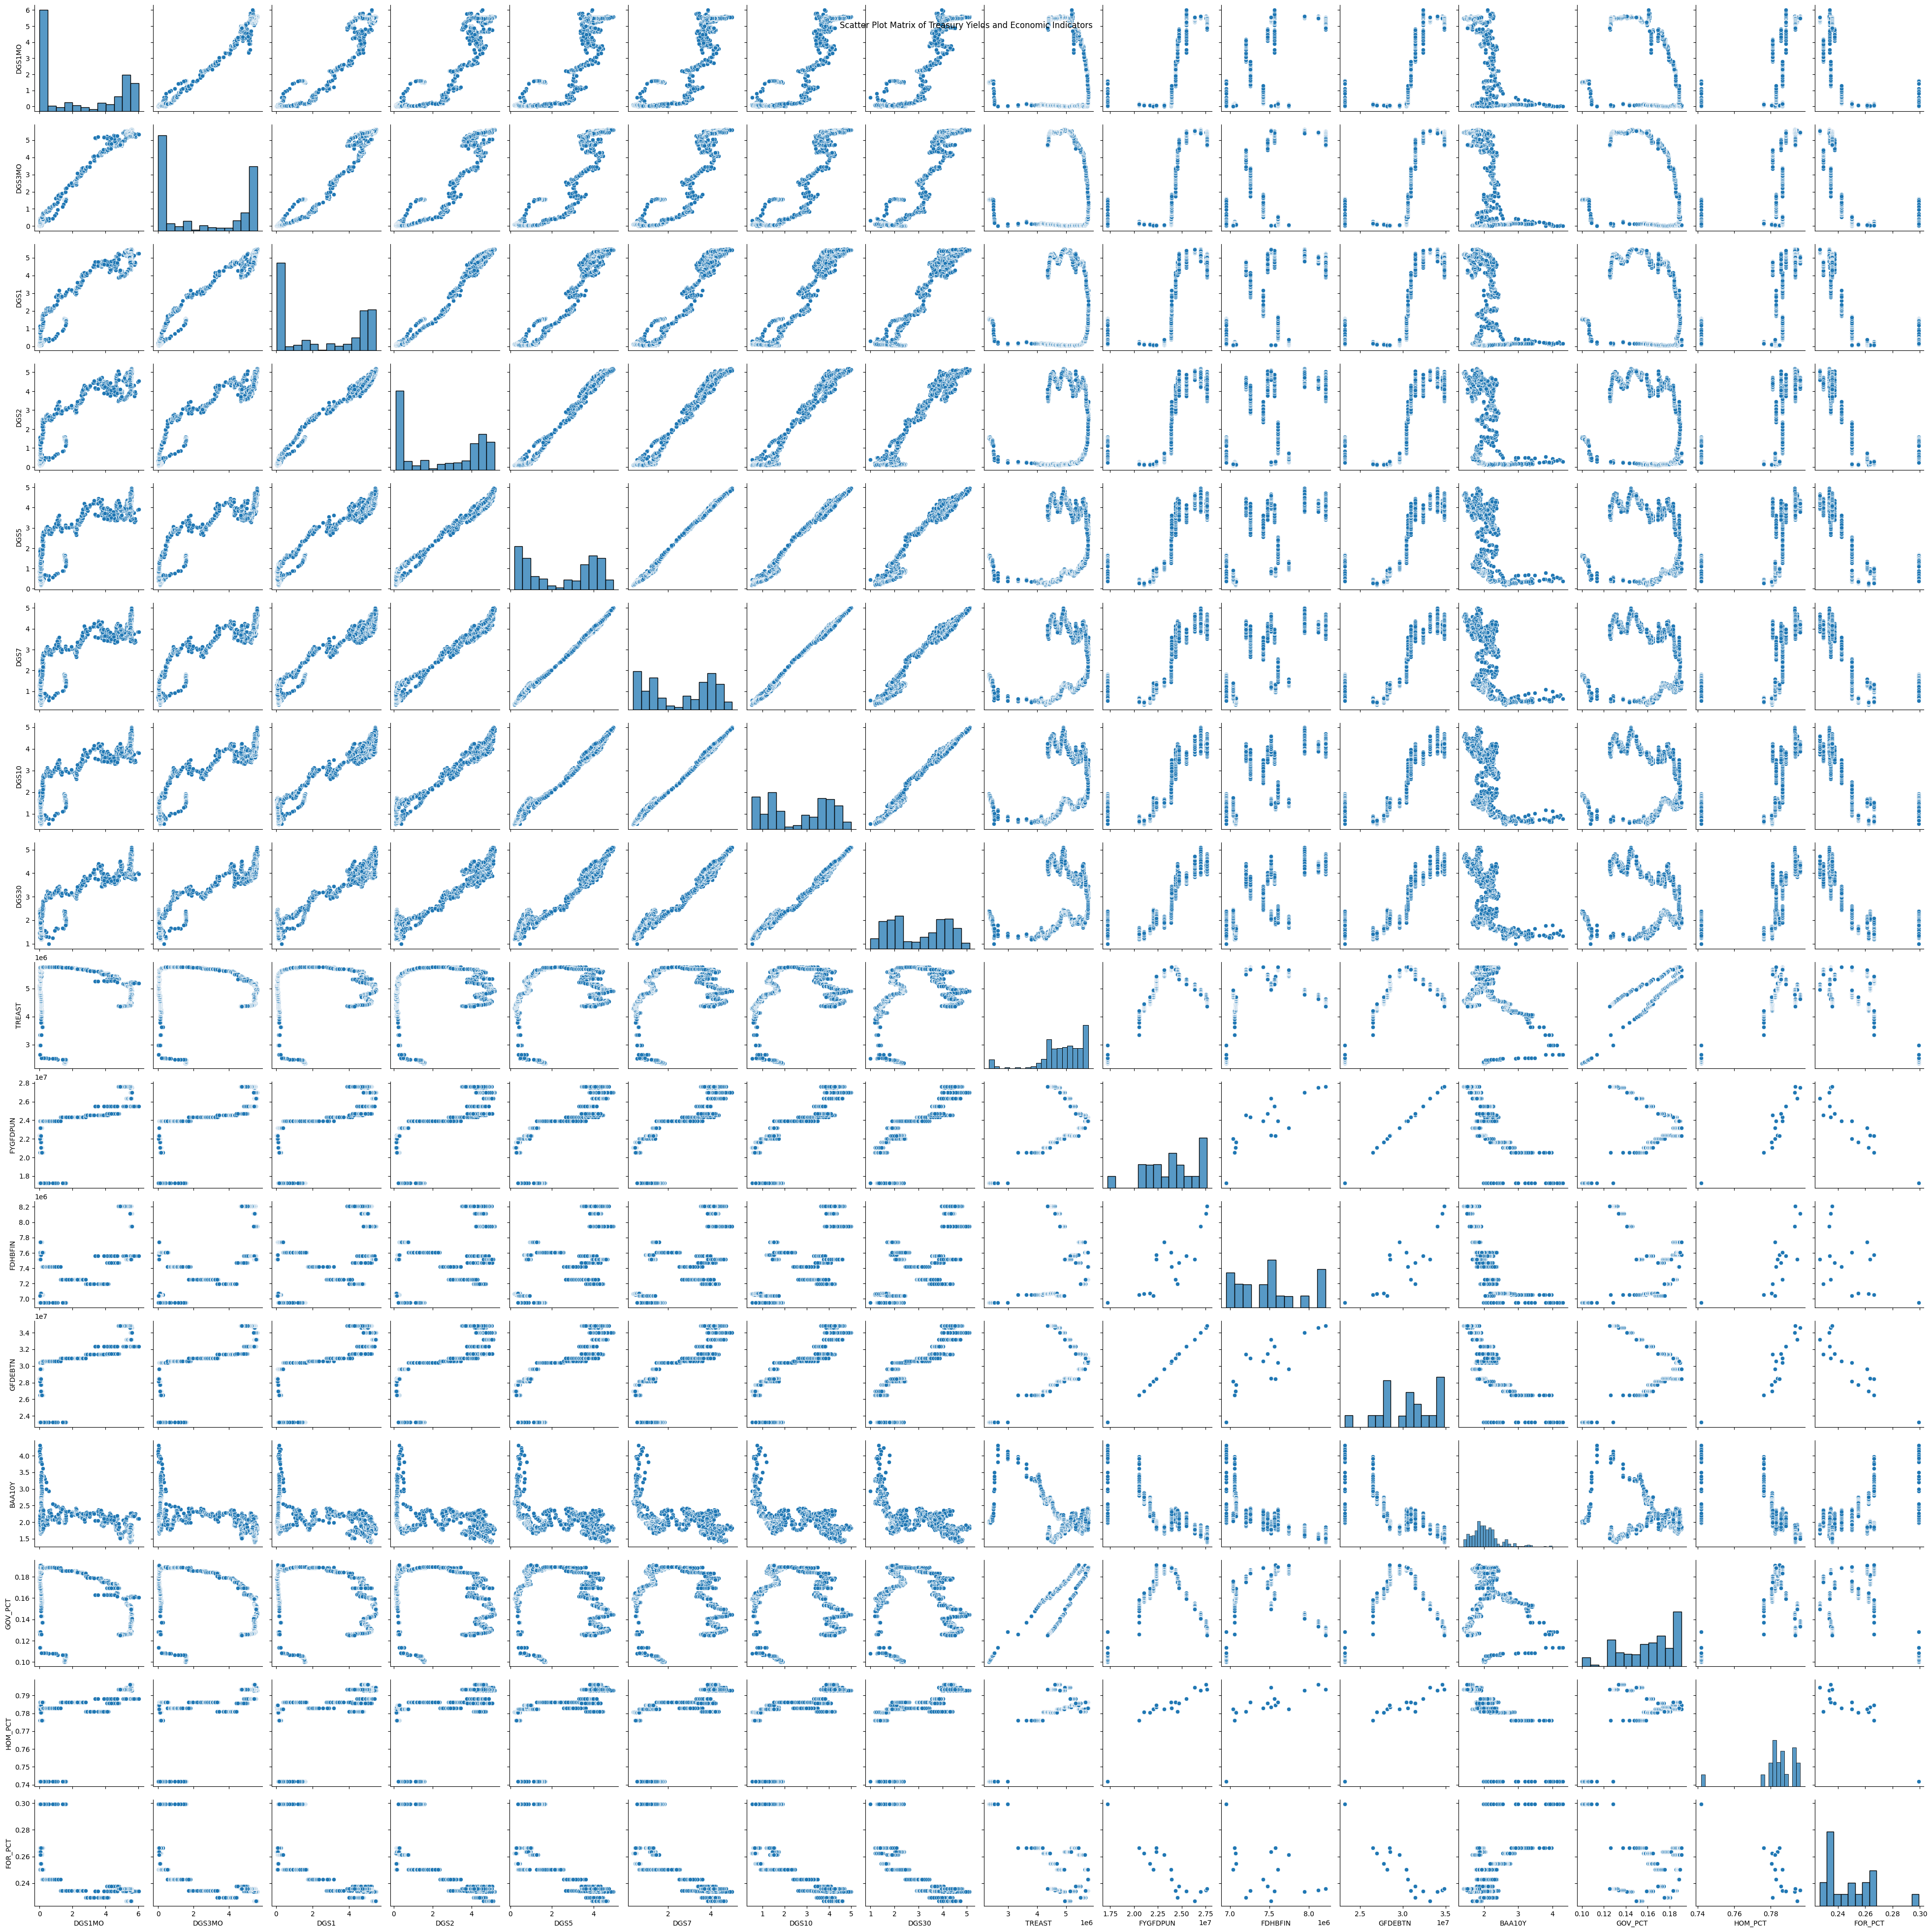

In [ ]:
# Scatterplot Matrix
plt.figure(figsize=(15, 15))
sns.pairplot(tsy_data)
plt.suptitle("Scatter Plot Matrix of Treasury Yields and Economic Indicators")
plt.show()

Section 4: Data Preparation - Define Features and Target Variables

In [ ]:
# Select target variables (1M, 5Y, and 30Y yields)
y = tsy_data[['DGS1MO', 'DGS5', 'DGS30']]

# Select features (other tenors and economic indicators)
X = tsy_data[['DGS3MO', 'DGS1', 'DGS2', 'DGS7', 'DGS10', 'GOV_PCT', 'HOM_PCT', 'FOR_PCT', 'BAA10Y']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Section 5: Model Training and Evaluation

In [ ]:
# Initialize models with default parameters
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'CART (Decision Tree)': DecisionTreeRegressor(),
    'Artificial Neural Network (MLP)': MLPRegressor(max_iter=500, random_state=42)
}

# Dictionary to store evaluation metrics for each model
results = {}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    results[name] = {'Train MSE': train_mse, 'Test MSE': test_mse}
    print(f"{name}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

Linear Regression: Train MSE = 0.0099, Test MSE = 0.0051
Lasso Regression: Train MSE = 1.0361, Test MSE = 1.0748
ElasticNet Regression: Train MSE = 0.5067, Test MSE = 0.5230
K-Nearest Neighbors: Train MSE = 0.0025, Test MSE = 0.0043
CART (Decision Tree): Train MSE = 0.0000, Test MSE = 0.0040
Artificial Neural Network (MLP): Train MSE = 0.0168, Test MSE = 0.0135


Section 5.1: Compare models and algorithms

In [ ]:
# Visualize algorithm performance
algorithms = list(results.keys())
train_errors = [results[algo]['Train MSE'] for algo in algorithms]
test_errors = [results[algo]['Test MSE'] for algo in algorithms]
x = np.arange(len(algorithms))
width = 0.35

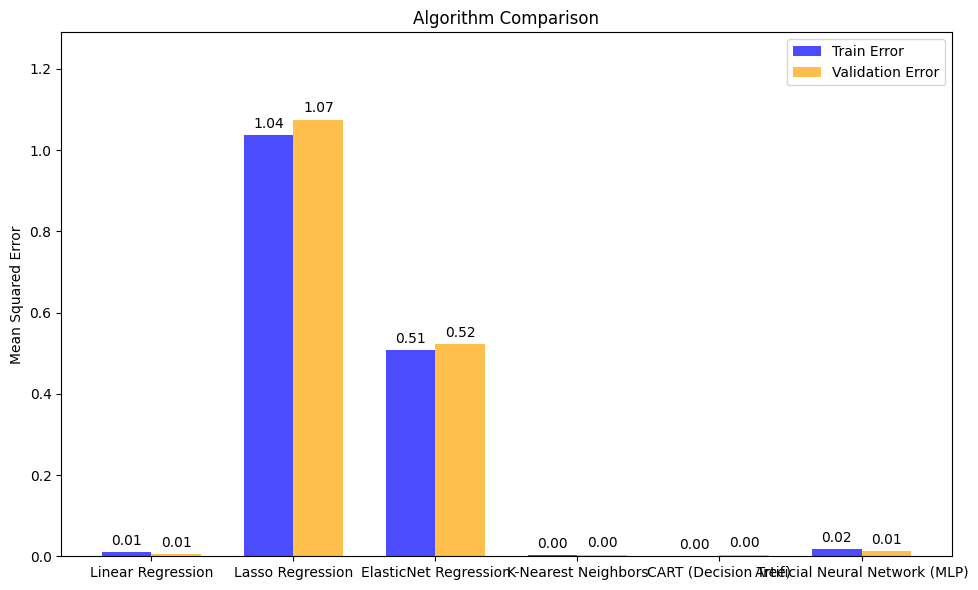

In [ ]:
# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_errors, width, label='Train Error', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, test_errors, width, label='Validation Error', color='orange', alpha=0.7)
ax.set_ylabel('Mean Squared Error')
ax.set_title('Algorithm Comparison')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylim(0, max(test_errors) * 1.2)
ax.legend(loc='upper right')

# Annotate bars with heights
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Section 6: Model Tuning with Grid Search

In [ ]:
# Grid Search for MLP hidden layer sizes
param_grid = {'hidden_layer_sizes': [(20,), (50,), (20, 20), (20, 30, 20)]}
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=MLPRegressor(max_iter=500, random_state=42),
                    param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_:.4f} using {grid_result.best_params_}")
for mean, stdev, param in zip(grid_result.cv_results_['mean_test_score'],
                              grid_result.cv_results_['std_test_score'],
                              grid_result.cv_results_['params']):
    print(f"{mean:.4f} ({stdev:.4f}) with: {param}")

Best: -0.0202 using {'hidden_layer_sizes': (20, 30, 20)}
-0.0487 (0.0069) with: {'hidden_layer_sizes': (20,)}
-0.0360 (0.0073) with: {'hidden_layer_sizes': (50,)}
-0.0249 (0.0032) with: {'hidden_layer_sizes': (20, 20)}
-0.0202 (0.0035) with: {'hidden_layer_sizes': (20, 30, 20)}



Section 7: Prediction Comparison Visualization

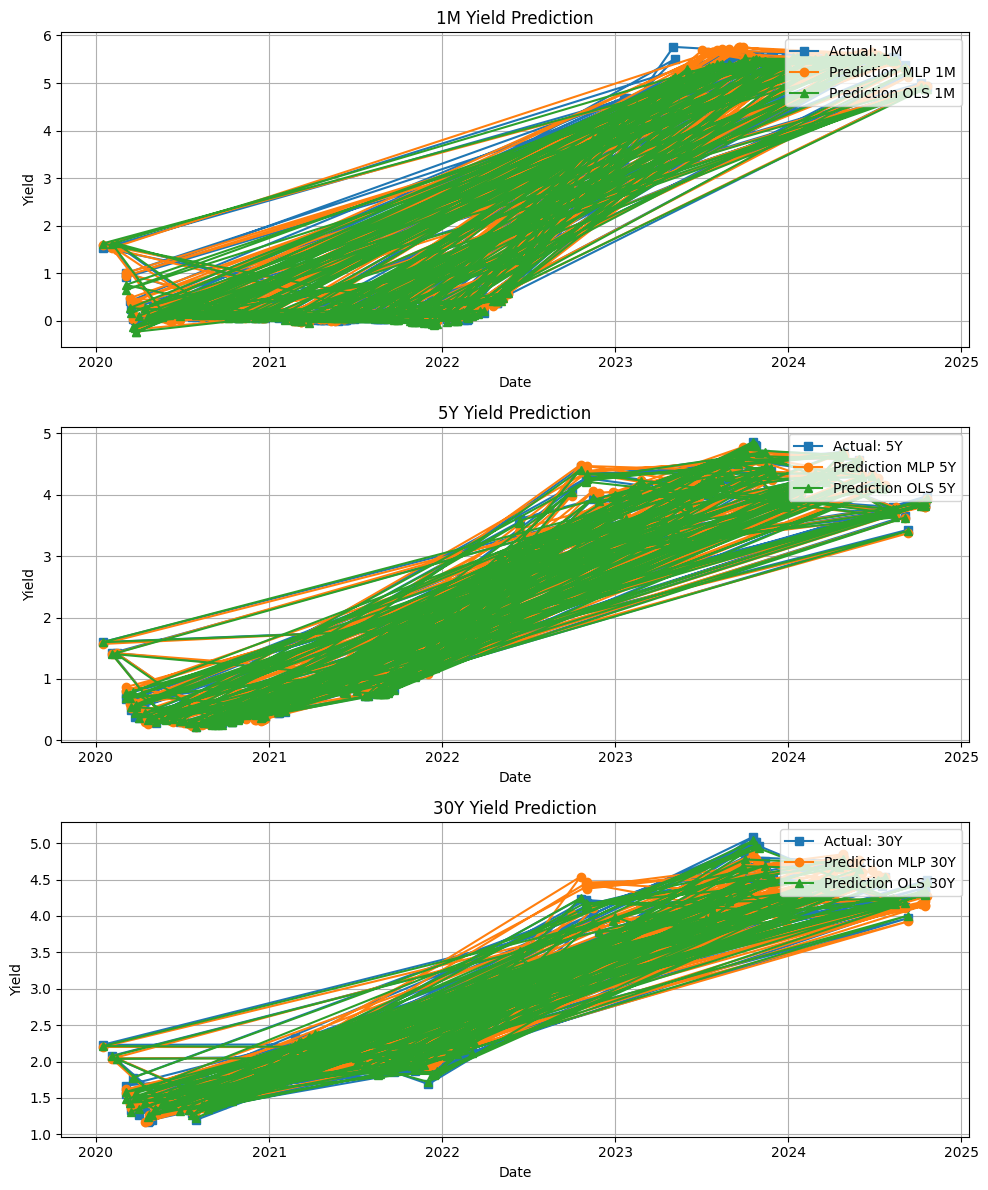

In [ ]:
# Assuming 'models' dictionary contains trained models as in your code above

# Generate predictions from the trained MLP model and Linear Regression model
y_test_pred_mlp = models['Artificial Neural Network (MLP)'].predict(X_test)
y_test_pred_lr = models['Linear Regression'].predict(X_test)

# Create DataFrame for plotting
df = pd.DataFrame({
    'Actual 1M': y_test.iloc[:, 0],  # Assuming y_test columns are ordered as 1M, 5Y, 30Y
    'Actual 5Y': y_test.iloc[:, 1],
    'Actual 30Y': y_test.iloc[:, 2],
    'Predicted Artificial Neural Network (MLP) 1M': y_test_pred_mlp[:, 0],
    'Predicted Artificial Neural Network (MLP) 5Y': y_test_pred_mlp[:, 1],
    'Predicted Artificial Neural Network (MLP) 30Y': y_test_pred_mlp[:, 2],
    'Predicted Linear Regression 1M': y_test_pred_lr[:, 0],
    'Predicted Linear Regression 5Y': y_test_pred_lr[:, 1],
    'Predicted Linear Regression 30Y': y_test_pred_lr[:, 2]
}, index=y_test.index)

# Plot the data
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
yields = ['1M', '5Y', '30Y']
colors = ['tab:blue', 'tab:blue', 'tab:blue']

for i, yield_type in enumerate(yields):
    axs[i].plot(df.index, df[f'Actual {yield_type}'], label=f'Actual: {yield_type}', color=colors[i], marker='s')
    axs[i].plot(df.index, df[f'Predicted Artificial Neural Network (MLP) {yield_type}'], label=f'Prediction MLP {yield_type}', color='tab:orange', marker='o')
    axs[i].plot(df.index, df[f'Predicted Linear Regression {yield_type}'], label=f'Prediction OLS {yield_type}', color='tab:green', marker='^')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Yield')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    axs[i].set_title(f'{yield_type} Yield Prediction')

plt.tight_layout()
plt.show()
